# Previsão de Demanda de Motocicletas - Sistema Mottu

## Objetivo

Sistema de Machine Learning para previsão de demanda de motocicletas em galpões de delivery.

**Targets:**
1. Quantidade de motos que sairão do galpão
2. Quantidade de motos que retornarão ao galpão

**Equipe:**
- Marcos Vinicius Pereira de Oliveira - RM 557252
- Ruan Lima Silva - RM 558775
- Richardy Borges Santana - RM 557883


## 1. Importação de Bibliotecas e Configurações


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(f"Bibliotecas carregadas. Random State: {RANDOM_STATE}")


Bibliotecas carregadas. Random State: 42


## 2. Carregamento dos Dados


In [2]:
DATA_PATH = "dados_mottu_corrigido.csv"
df = pd.read_csv(DATA_PATH)

print(f"Dataset carregado: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"Colunas: {list(df.columns)}")
df.head()


Dataset carregado: 250 linhas x 11 colunas
Colunas: ['galpao', 'dia_semana', 'motos_em_uso', 'motos_que_sairam', 'motos_que_voltaram', 'motos_disponiveis', 'choveu', 'total_motos', 'feriado', 'tipo_dia', 'saldo_dia']


,galpao,dia_semana,motos_em_uso,motos_que_sairam,motos_que_voltaram,motos_disponiveis,choveu,total_motos,feriado,tipo_dia,saldo_dia
0,BUTANTAN,3,24,15,12,76,1,100,0,util,3
1,BUTANTAN,5,23,23,23,77,1,100,0,fim_de_semana,0
2,BUTANTAN,5,20,20,20,80,1,100,0,fim_de_semana,0
3,BUTANTAN,3,18,17,17,82,1,100,0,util,0
4,BUTANTAN,2,28,18,16,72,0,100,0,util,2


In [3]:
print("Informações do Dataset")
print("-" * 50)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores nulos:")
print(df.isnull().sum())
print("\nEstatísticas descritivas:")
df.describe().round(2)


Informações do Dataset
--------------------------------------------------

Tipos de dados:
galpao                object
dia_semana             int64
motos_em_uso           int64
motos_que_sairam       int64
motos_que_voltaram     int64
motos_disponiveis      int64
choveu                 int64
total_motos            int64
feriado                int64
tipo_dia              object
saldo_dia              int64
dtype: object

Valores nulos:
galpao                0
dia_semana            0
motos_em_uso          0
motos_que_sairam      0
motos_que_voltaram    0
motos_disponiveis     0
choveu                0
total_motos           0
feriado               0
tipo_dia              0
saldo_dia             0
dtype: int64

Estatísticas descritivas:


,dia_semana,motos_em_uso,motos_que_sairam,motos_que_voltaram,motos_disponiveis,choveu,total_motos,feriado,saldo_dia
count,250.00,250.00,250.00,250.00,250.00,250.00,250.0,250.00,250.00
mean,3.13,21.21,22.75,20.46,78.79,0.35,100.0,0.04,2.29
std,1.98,4.21,7.00,5.82,4.21,0.48,0.0,0.21,2.52
min,0.00,11.00,11.00,10.00,65.00,0.00,100.0,0.00,-1.00
25%,1.00,18.00,18.00,17.00,76.00,0.00,100.0,0.00,0.00
50%,3.00,20.00,21.00,19.00,80.00,0.00,100.0,0.00,2.00
75%,5.00,24.00,26.00,23.00,82.00,1.00,100.0,0.00,4.00
max,6.00,35.00,50.00,45.00,89.00,1.00,100.0,1.00,11.00


## 3. Análise Exploratória dos Dados

### 3.1 Distribuição das Variáveis Target


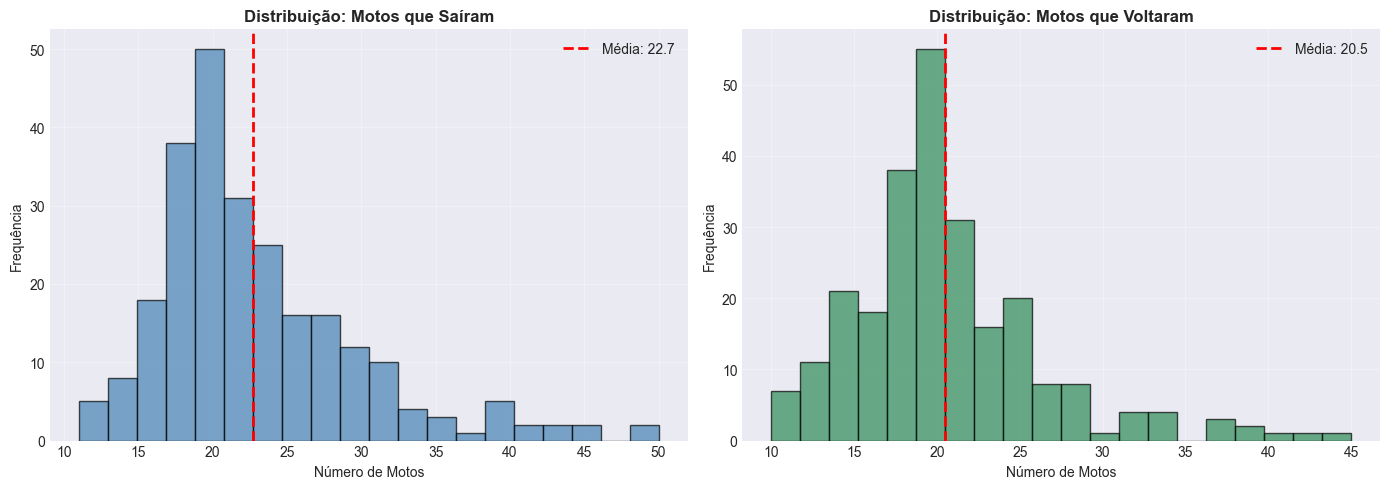

Motos que saíram  - Média: 22.75, DP: 7.00, Min: 11, Max: 50
Motos que voltaram - Média: 20.46, DP: 5.82, Min: 10, Max: 45


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['motos_que_sairam'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['motos_que_sairam'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Média: {df["motos_que_sairam"].mean():.1f}')
axes[0].set_xlabel('Número de Motos')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição: Motos que Saíram', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['motos_que_voltaram'], bins=20, color='seagreen', edgecolor='black', alpha=0.7)
axes[1].axvline(df['motos_que_voltaram'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Média: {df["motos_que_voltaram"].mean():.1f}')
axes[1].set_xlabel('Número de Motos')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição: Motos que Voltaram', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Motos que saíram  - Média: {df['motos_que_sairam'].mean():.2f}, "
      f"DP: {df['motos_que_sairam'].std():.2f}, "
      f"Min: {df['motos_que_sairam'].min():.0f}, Max: {df['motos_que_sairam'].max():.0f}")
print(f"Motos que voltaram - Média: {df['motos_que_voltaram'].mean():.2f}, "
      f"DP: {df['motos_que_voltaram'].std():.2f}, "
      f"Min: {df['motos_que_voltaram'].min():.0f}, Max: {df['motos_que_voltaram'].max():.0f}")


### 3.2 Análise por Dia da Semana


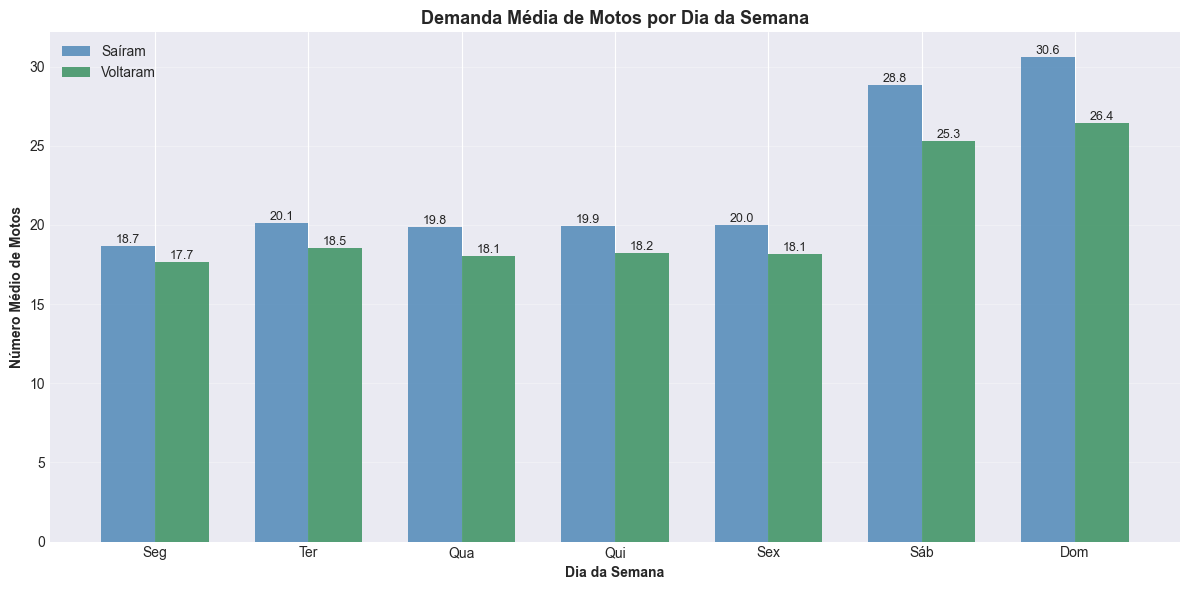


Média por Dia da Semana:
          motos_que_sairam  motos_que_voltaram
dia_nome                                      
Seg                  18.70               17.67
Ter                  20.14               18.51
Qua                  19.85               18.06
Qui                  19.91               18.21
Sex                  19.98               18.15
Sáb                  28.81               25.30
Dom                  30.63               26.42


In [5]:
dias_map = {0: 'Seg', 1: 'Ter', 2: 'Qua', 3: 'Qui', 4: 'Sex', 5: 'Sáb', 6: 'Dom'}
df_temp = df.copy()
df_temp['dia_nome'] = df_temp['dia_semana'].map(dias_map)

grupo_dia = df_temp.groupby('dia_nome')[['motos_que_sairam', 'motos_que_voltaram']].mean()
grupo_dia = grupo_dia.reindex(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(grupo_dia.index))
width = 0.35

bars1 = ax.bar(x - width/2, grupo_dia['motos_que_sairam'], width, 
               label='Saíram', color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, grupo_dia['motos_que_voltaram'], width, 
               label='Voltaram', color='seagreen', alpha=0.8)

ax.set_xlabel('Dia da Semana', fontweight='bold')
ax.set_ylabel('Número Médio de Motos', fontweight='bold')
ax.set_title('Demanda Média de Motos por Dia da Semana', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(grupo_dia.index)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nMédia por Dia da Semana:")
print(grupo_dia.round(2))


### 3.3 Análise por Condições


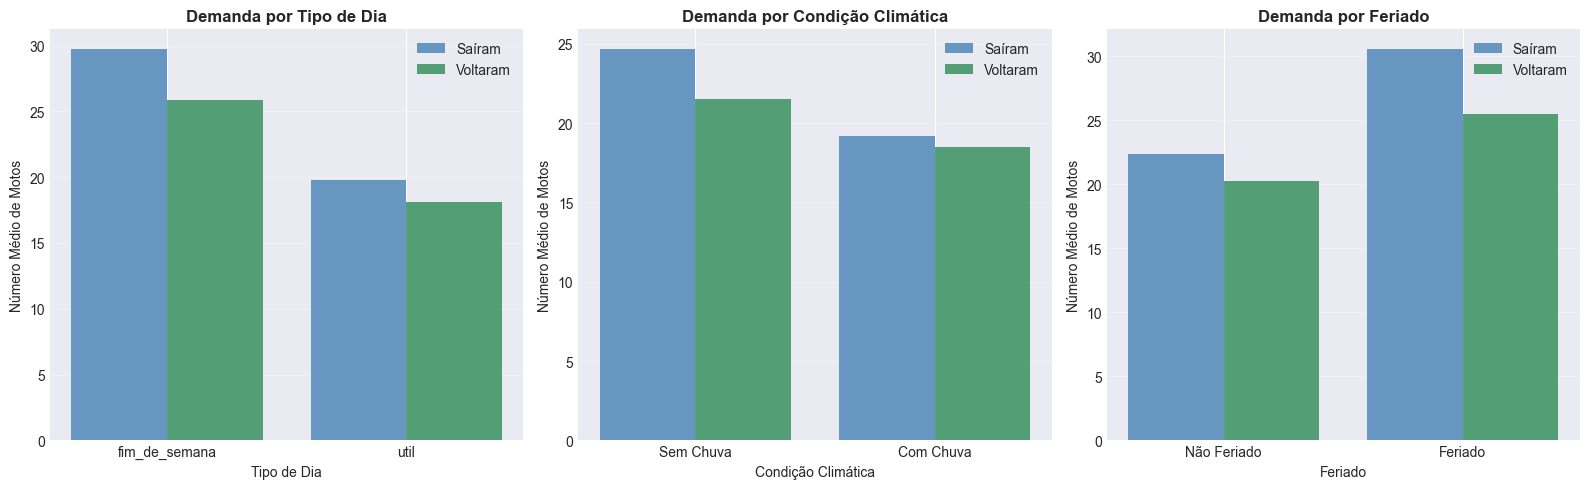


Estatísticas:
Dias úteis: 175 | Fins de semana: 75
Dias sem chuva: 163 | Dias com chuva: 87
Feriados: 11 | Não feriados: 239


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

tipo_dia_grupo = df.groupby('tipo_dia')[['motos_que_sairam', 'motos_que_voltaram']].mean()
x_pos = np.arange(len(tipo_dia_grupo))
axes[0].bar(x_pos - 0.2, tipo_dia_grupo['motos_que_sairam'], 0.4, 
            label='Saíram', color='steelblue', alpha=0.8)
axes[0].bar(x_pos + 0.2, tipo_dia_grupo['motos_que_voltaram'], 0.4, 
            label='Voltaram', color='seagreen', alpha=0.8)
axes[0].set_title('Demanda por Tipo de Dia', fontweight='bold')
axes[0].set_xlabel('Tipo de Dia')
axes[0].set_ylabel('Número Médio de Motos')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(tipo_dia_grupo.index)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

chuva_grupo = df.groupby('choveu')[['motos_que_sairam', 'motos_que_voltaram']].mean()
chuva_labels = ['Sem Chuva', 'Com Chuva']
x_pos = np.arange(len(chuva_labels))
axes[1].bar(x_pos - 0.2, chuva_grupo['motos_que_sairam'], 0.4, 
            label='Saíram', color='steelblue', alpha=0.8)
axes[1].bar(x_pos + 0.2, chuva_grupo['motos_que_voltaram'], 0.4, 
            label='Voltaram', color='seagreen', alpha=0.8)
axes[1].set_title('Demanda por Condição Climática', fontweight='bold')
axes[1].set_xlabel('Condição Climática')
axes[1].set_ylabel('Número Médio de Motos')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(chuva_labels)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

feriado_grupo = df.groupby('feriado')[['motos_que_sairam', 'motos_que_voltaram']].mean()
feriado_labels = ['Não Feriado', 'Feriado']
x_pos = np.arange(len(feriado_labels))
axes[2].bar(x_pos - 0.2, feriado_grupo['motos_que_sairam'], 0.4, 
            label='Saíram', color='steelblue', alpha=0.8)
axes[2].bar(x_pos + 0.2, feriado_grupo['motos_que_voltaram'], 0.4, 
            label='Voltaram', color='seagreen', alpha=0.8)
axes[2].set_title('Demanda por Feriado', fontweight='bold')
axes[2].set_xlabel('Feriado')
axes[2].set_ylabel('Número Médio de Motos')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(feriado_labels)
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nEstatísticas:")
print(f"Dias úteis: {len(df[df['tipo_dia'] == 'util'])} | "
      f"Fins de semana: {len(df[df['tipo_dia'] == 'fim_de_semana'])}")
print(f"Dias sem chuva: {len(df[df['choveu'] == 0])} | Dias com chuva: {len(df[df['choveu'] == 1])}")
print(f"Feriados: {len(df[df['feriado'] == 1])} | Não feriados: {len(df[df['feriado'] == 0])}")


### 3.4 Correlação entre Variáveis


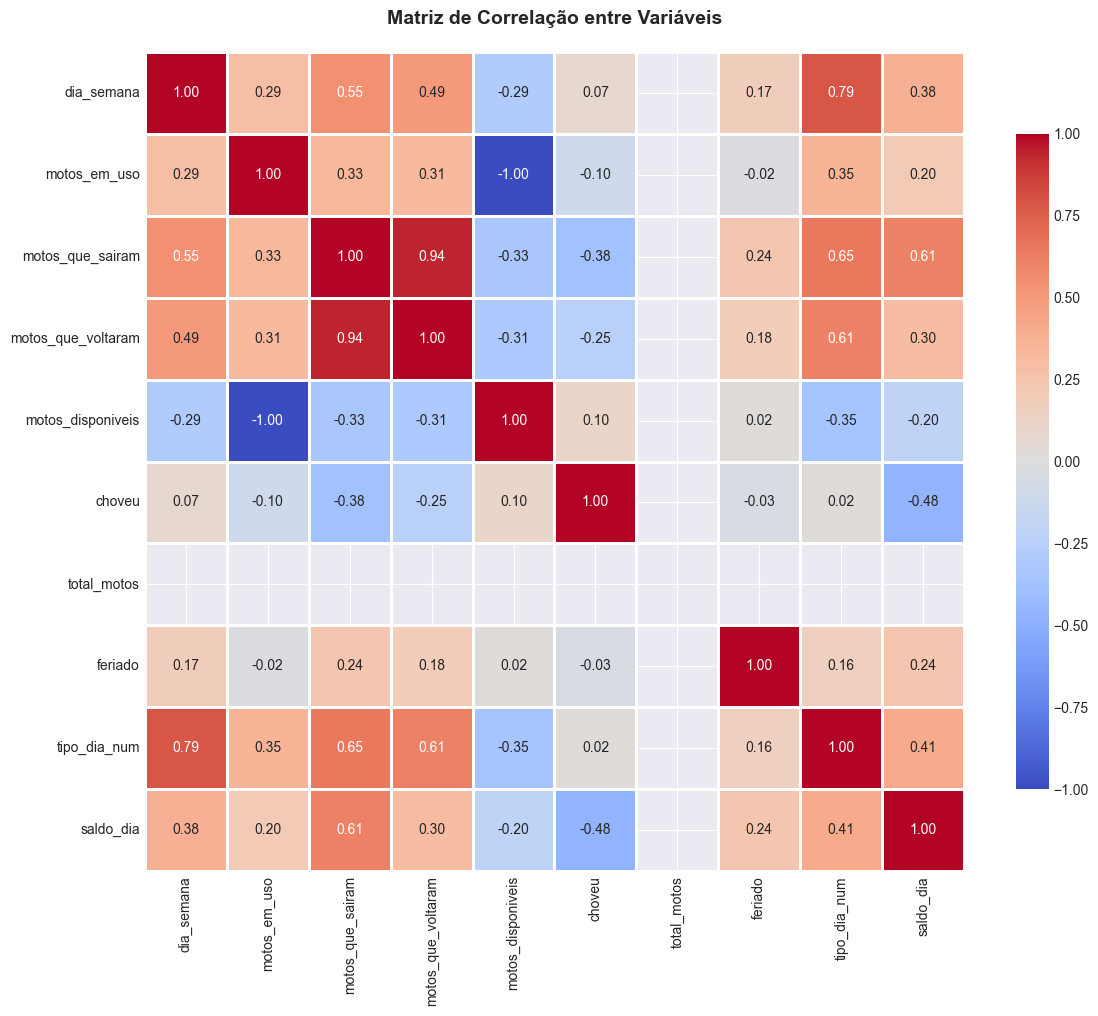


Top 5 Correlações com 'motos_que_sairam':
motos_que_voltaram    0.939380
tipo_dia_num          0.654589
saldo_dia             0.610015
dia_semana            0.546309
motos_em_uso          0.334967
Name: motos_que_sairam, dtype: float64

Top 5 Correlações com 'motos_que_voltaram':
motos_que_sairam    0.939380
tipo_dia_num        0.610128
dia_semana          0.493782
motos_em_uso        0.314838
saldo_dia           0.301344
Name: motos_que_voltaram, dtype: float64


In [7]:
df_corr = df.copy()
df_corr['tipo_dia_num'] = df_corr['tipo_dia'].map({'util': 0, 'fim_de_semana': 1})
df_corr['galpao_num'] = df_corr['galpao'].astype('category').cat.codes

cols_num = ['dia_semana', 'motos_em_uso', 'motos_que_sairam', 'motos_que_voltaram',
            'motos_disponiveis', 'choveu', 'total_motos', 'feriado', 'tipo_dia_num', 'saldo_dia']

correlacao = df_corr[cols_num].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nTop 5 Correlações com 'motos_que_sairam':")
corr_saida = correlacao['motos_que_sairam'].sort_values(ascending=False)
print(corr_saida[corr_saida.index != 'motos_que_sairam'].head(5))

print("\nTop 5 Correlações com 'motos_que_voltaram':")
corr_volta = correlacao['motos_que_voltaram'].sort_values(ascending=False)
print(corr_volta[corr_volta.index != 'motos_que_voltaram'].head(5))


## 4. Feature Engineering

### 4.1 Criação de Features Derivadas


In [8]:
df_model = df.copy()

df_model['tipo_dia'] = df_model['tipo_dia'].map({'util': 0, 'fim_de_semana': 1})
df_model['galpao'] = df_model['galpao'].astype('category').cat.codes

print(f"Tipo_dia convertido: {df_model['tipo_dia'].unique()}")
print(f"Galpão convertido: {df_model['galpao'].unique()}")

df_model['taxa_ocupacao'] = df_model['motos_em_uso'] / df_model['total_motos']
df_model['choveu_fds'] = df_model['choveu'] * df_model['tipo_dia']
df_model['feriado_fds'] = df_model['feriado'] * df_model['tipo_dia']

FEATURES = [
    "galpao", "dia_semana", "motos_em_uso", "motos_disponiveis",
    "choveu", "total_motos", "feriado", "tipo_dia", "saldo_dia",
    "taxa_ocupacao", "choveu_fds", "feriado_fds"
]

print(f"\nTotal de features: {len(FEATURES)}")
print(f"Features utilizadas:")
for i, feat in enumerate(FEATURES, 1):
    print(f"  {i:2d}. {feat}")

print("\nVerificando features...")
for feat in FEATURES:
    if feat not in df_model.columns:
        print(f"ERRO: Feature '{feat}' não encontrada!")
    else:
        print(f"{feat}: OK")

print("\nFeature engineering concluído.")


Tipo_dia convertido: [0 1]
Galpão convertido: [0]

Total de features: 12
Features utilizadas:
   1. galpao
   2. dia_semana
   3. motos_em_uso
   4. motos_disponiveis
   5. choveu
   6. total_motos
   7. feriado
   8. tipo_dia
   9. saldo_dia
  10. taxa_ocupacao
  11. choveu_fds
  12. feriado_fds

Verificando features...
galpao: OK
dia_semana: OK
motos_em_uso: OK
motos_disponiveis: OK
choveu: OK
total_motos: OK
feriado: OK
tipo_dia: OK
saldo_dia: OK
taxa_ocupacao: OK
choveu_fds: OK
feriado_fds: OK

Feature engineering concluído.


Estatísticas das Features Derivadas:

       taxa_ocupacao  choveu_fds  feriado_fds
count       250.0000     250.000     250.0000
mean          0.2121       0.108       0.0280
std           0.0421       0.311       0.1653
min           0.1100       0.000       0.0000
25%           0.1800       0.000       0.0000
50%           0.2000       0.000       0.0000
75%           0.2400       0.000       0.0000
max           0.3500       1.000       1.0000


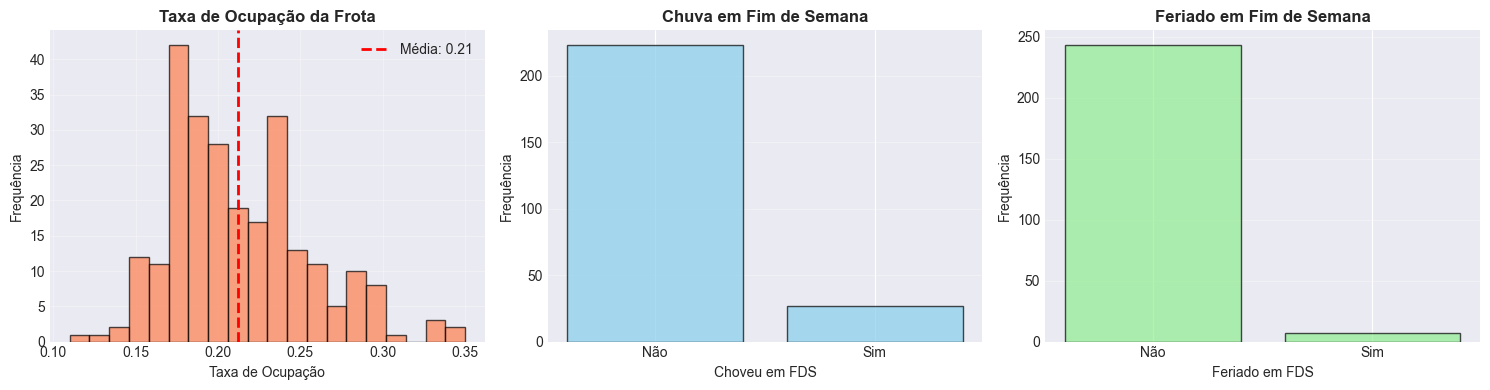

In [9]:
print("Estatísticas das Features Derivadas:\n")
print(df_model[['taxa_ocupacao', 'choveu_fds', 'feriado_fds']].describe().round(4))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df_model['taxa_ocupacao'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(df_model['taxa_ocupacao'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Média: {df_model["taxa_ocupacao"].mean():.2f}')
axes[0].set_xlabel('Taxa de Ocupação')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Taxa de Ocupação da Frota', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

choveu_fds_counts = df_model['choveu_fds'].value_counts().sort_index()
axes[1].bar(choveu_fds_counts.index, choveu_fds_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Choveu em FDS')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Chuva em Fim de Semana', fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não', 'Sim'])
axes[1].grid(True, alpha=0.3, axis='y')

feriado_fds_counts = df_model['feriado_fds'].value_counts().sort_index()
axes[2].bar(feriado_fds_counts.index, feriado_fds_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Feriado em FDS')
axes[2].set_ylabel('Frequência')
axes[2].set_title('Feriado em Fim de Semana', fontweight='bold')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Não', 'Sim'])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 5. Pré-processamento e Divisão dos Dados

### 5.1 Separação de Features e Targets


In [10]:
X = df_model[FEATURES]
y_saida = df_model['motos_que_sairam']
y_volta = df_model['motos_que_voltaram']

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y_saida: {y_saida.shape}")
print(f"Shape de y_volta: {y_volta.shape}")
print(f"\nFeatures (X):")
print(X.head())
print(f"\nTarget 1 (y_saida) - primeiros valores: {y_saida.head().values}")
print(f"Target 2 (y_volta) - primeiros valores: {y_volta.head().values}")


Shape de X (features): (250, 12)
Shape de y_saida: (250,)
Shape de y_volta: (250,)

Features (X):
   galpao  dia_semana  motos_em_uso  motos_disponiveis  choveu  total_motos  \
0       0           3            24                 76       1          100   
1       0           5            23                 77       1          100   
2       0           5            20                 80       1          100   
3       0           3            18                 82       1          100   
4       0           2            28                 72       0          100   

   feriado  tipo_dia  saldo_dia  taxa_ocupacao  choveu_fds  feriado_fds  
0        0         0          3           0.24           0            0  
1        0         1          0           0.23           1            0  
2        0         1          0           0.20           1            0  
3        0         0          0           0.18           0            0  
4        0         0          2           0.28           

### 5.2 Divisão em Treino e Teste


In [11]:
TEST_SIZE = 0.3

X_train, X_test, y_saida_train, y_saida_test = train_test_split(
    X, y_saida, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

_, _, y_volta_train, y_volta_test = train_test_split(
    X, y_volta, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(f"Conjunto de TREINO: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de TESTE:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Shape X_train: {X_train.shape} | X_test: {X_test.shape}")


Conjunto de TREINO: 175 amostras (70.0%)
Conjunto de TESTE:  75 amostras (30.0%)
Shape X_train: (175, 12) | X_test: (75, 12)


### 5.3 Normalização dos Dados


In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalização concluída.")
print(f"Dados ORIGINAIS - Min: {X_train.min().min():.2f}, Max: {X_train.max().max():.2f}")
print(f"Dados NORMALIZADOS - Min: {X_train_scaled.min():.2f}, Max: {X_train_scaled.max():.2f}")


Normalização concluída.
Dados ORIGINAIS - Min: -1.00, Max: 100.00
Dados NORMALIZADOS - Min: 0.00, Max: 1.00


## 6. Treinamento dos Modelos RandomForest

### 6.1 Modelo 1: Previsão de Motos que Saíram


In [13]:
model_saida = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

model_saida.fit(X_train_scaled, y_saida_train)

y_saida_pred_train = model_saida.predict(X_train_scaled)
y_saida_pred_test = model_saida.predict(X_test_scaled)

mse_train_saida = mean_squared_error(y_saida_train, y_saida_pred_train)
mse_test_saida = mean_squared_error(y_saida_test, y_saida_pred_test)
mae_test_saida = mean_absolute_error(y_saida_test, y_saida_pred_test)
rmse_test_saida = np.sqrt(mse_test_saida)
r2_test_saida = r2_score(y_saida_test, y_saida_pred_test)

print("MÉTRICAS - Modelo de Saídas:")
print(f"  MSE (Treino):  {mse_train_saida:.4f}")
print(f"  MSE (Teste):   {mse_test_saida:.4f}")
print(f"  MAE (Teste):   {mae_test_saida:.4f}")
print(f"  RMSE (Teste):  {rmse_test_saida:.4f}")
print(f"  R² (Teste):    {r2_test_saida:.4f}")


MÉTRICAS - Modelo de Saídas:
  MSE (Treino):  8.0608
  MSE (Teste):   22.0482
  MAE (Teste):   3.1430
  RMSE (Teste):  4.6956
  R² (Teste):    0.5561


### 6.2 Modelo 2: Previsão de Motos que Voltaram


In [14]:
model_volta = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

model_volta.fit(X_train_scaled, y_volta_train)

y_volta_pred_train = model_volta.predict(X_train_scaled)
y_volta_pred_test = model_volta.predict(X_test_scaled)

mse_train_volta = mean_squared_error(y_volta_train, y_volta_pred_train)
mse_test_volta = mean_squared_error(y_volta_test, y_volta_pred_test)
mae_test_volta = mean_absolute_error(y_volta_test, y_volta_pred_test)
rmse_test_volta = np.sqrt(mse_test_volta)
r2_test_volta = r2_score(y_volta_test, y_volta_pred_test)

print("MÉTRICAS - Modelo de Voltas:")
print(f"  MSE (Treino):  {mse_train_volta:.4f}")
print(f"  MSE (Teste):   {mse_test_volta:.4f}")
print(f"  MAE (Teste):   {mae_test_volta:.4f}")
print(f"  RMSE (Teste):  {rmse_test_volta:.4f}")
print(f"  R² (Teste):    {r2_test_volta:.4f}")


MÉTRICAS - Modelo de Voltas:
  MSE (Treino):  7.9310
  MSE (Teste):   21.4976
  MAE (Teste):   3.0863
  RMSE (Teste):  4.6366
  R² (Teste):    0.3779


### 6.3 Comparação das Métricas


COMPARAÇÃO DAS MÉTRICAS
        Modelo       MSE      MAE     RMSE       R²
  Motos Saíram 22.048246 3.142979 4.695556 0.556090
Motos Voltaram 21.497645 3.086275 4.636555 0.377942


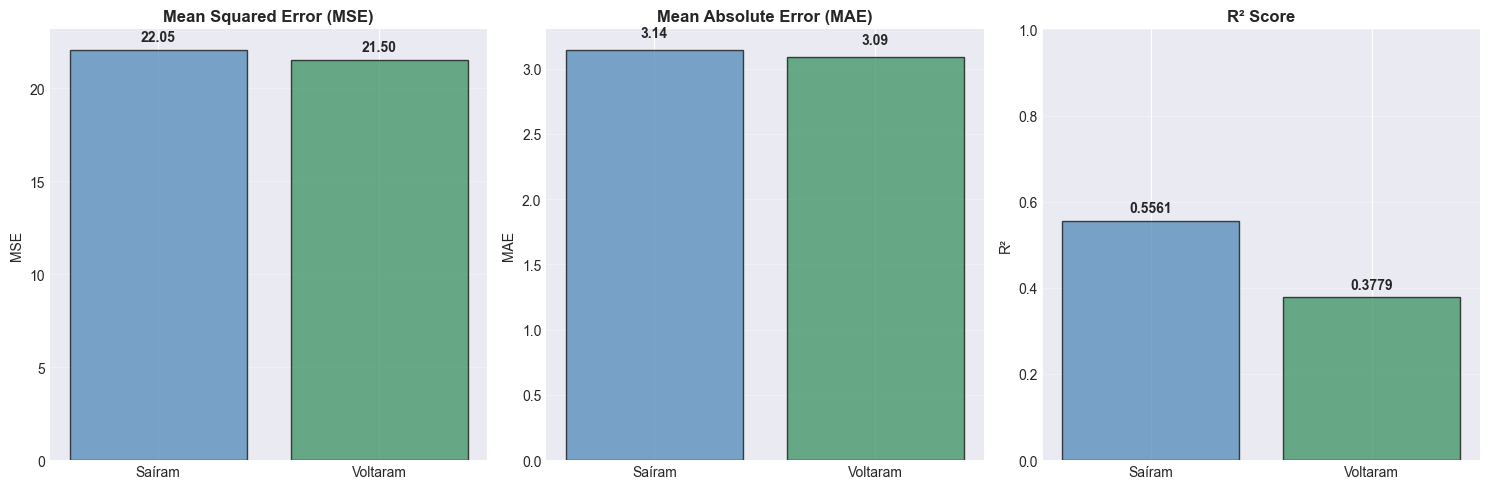

In [15]:
metricas_comparacao = pd.DataFrame({
    'Modelo': ['Motos Saíram', 'Motos Voltaram'],
    'MSE': [mse_test_saida, mse_test_volta],
    'MAE': [mae_test_saida, mae_test_volta],
    'RMSE': [rmse_test_saida, rmse_test_volta],
    'R²': [r2_test_saida, r2_test_volta]
})

print("COMPARAÇÃO DAS MÉTRICAS")
print(metricas_comparacao.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(['Saíram', 'Voltaram'], [mse_test_saida, mse_test_volta], 
            color=['steelblue', 'seagreen'], alpha=0.7, edgecolor='black')
axes[0].set_title('Mean Squared Error (MSE)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('MSE')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([mse_test_saida, mse_test_volta]):
    axes[0].text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')

axes[1].bar(['Saíram', 'Voltaram'], [mae_test_saida, mae_test_volta], 
            color=['steelblue', 'seagreen'], alpha=0.7, edgecolor='black')
axes[1].set_title('Mean Absolute Error (MAE)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('MAE')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([mae_test_saida, mae_test_volta]):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

axes[2].bar(['Saíram', 'Voltaram'], [r2_test_saida, r2_test_volta], 
            color=['steelblue', 'seagreen'], alpha=0.7, edgecolor='black')
axes[2].set_title('R² Score', fontweight='bold', fontsize=12)
axes[2].set_ylabel('R²')
axes[2].set_ylim([0, 1])
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([r2_test_saida, r2_test_volta]):
    axes[2].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Avaliação e Visualizações

### 7.1 Predições vs Valores Reais


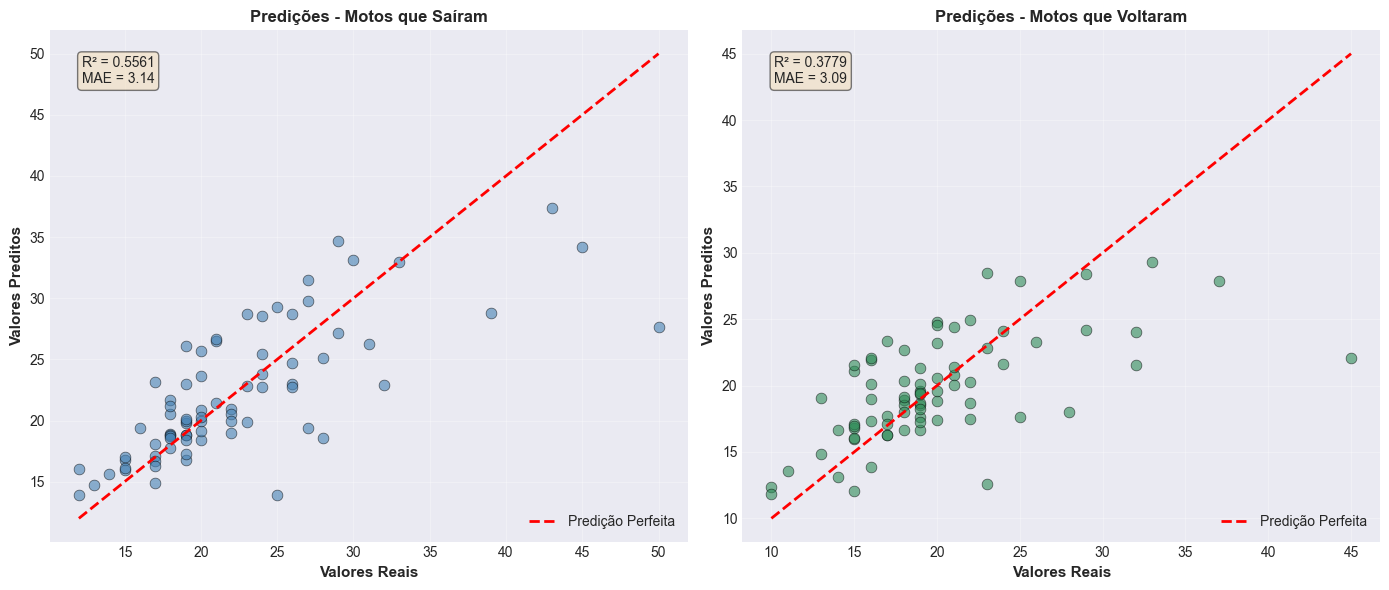

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_saida_test, y_saida_pred_test, alpha=0.6, c='steelblue', 
                s=60, edgecolors='black', linewidth=0.5)
axes[0].plot([y_saida_test.min(), y_saida_test.max()], 
             [y_saida_test.min(), y_saida_test.max()], 
             'r--', lw=2, label='Predição Perfeita')
axes[0].set_xlabel('Valores Reais', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Valores Preditos', fontsize=11, fontweight='bold')
axes[0].set_title('Predições - Motos que Saíram', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2_test_saida:.4f}\nMAE = {mae_test_saida:.2f}', 
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].scatter(y_volta_test, y_volta_pred_test, alpha=0.6, c='seagreen', 
                s=60, edgecolors='black', linewidth=0.5)
axes[1].plot([y_volta_test.min(), y_volta_test.max()], 
             [y_volta_test.min(), y_volta_test.max()], 
             'r--', lw=2, label='Predição Perfeita')
axes[1].set_xlabel('Valores Reais', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Valores Preditos', fontsize=11, fontweight='bold')
axes[1].set_title('Predições - Motos que Voltaram', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'R² = {r2_test_volta:.4f}\nMAE = {mae_test_volta:.2f}', 
             transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


### 7.2 Importância das Variáveis


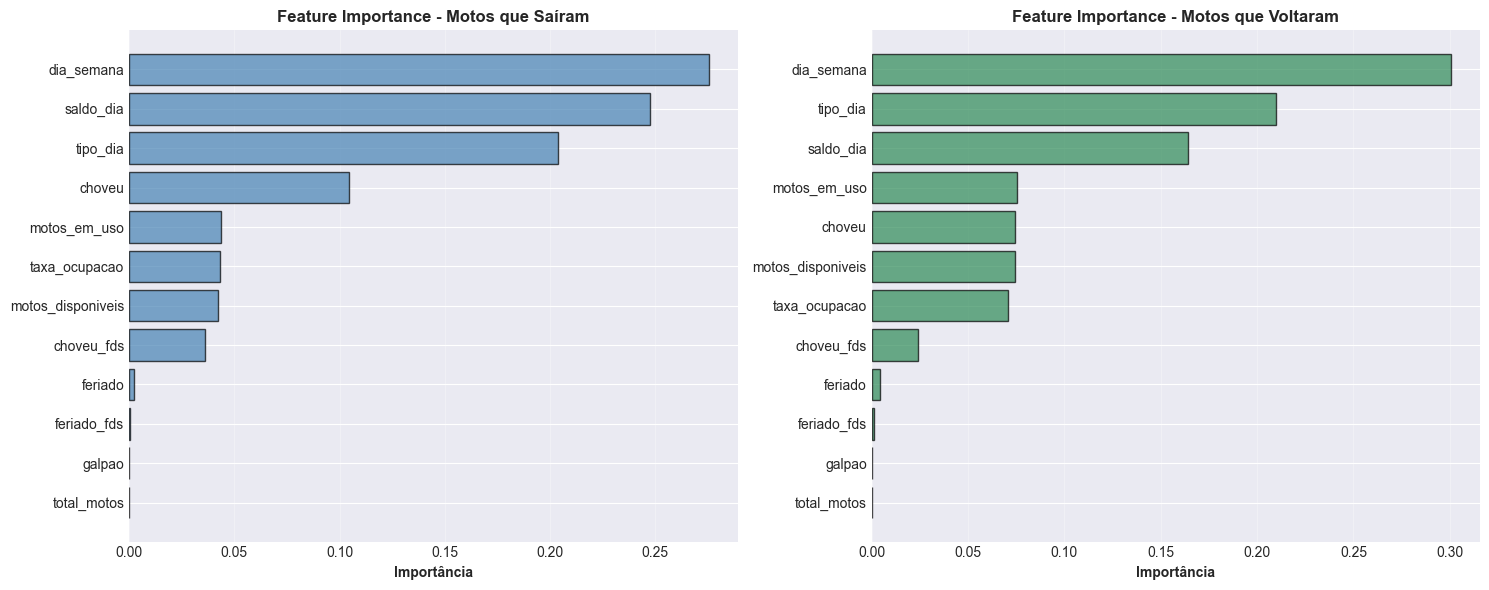


Top 5 Features Mais Importantes - Motos que Saíram:
     Feature  Importance
  dia_semana    0.275369
   saldo_dia    0.247643
    tipo_dia    0.204040
      choveu    0.104406
motos_em_uso    0.043664

Top 5 Features Mais Importantes - Motos que Voltaram:
     Feature  Importance
  dia_semana    0.300675
    tipo_dia    0.209958
   saldo_dia    0.164253
motos_em_uso    0.075432
      choveu    0.074608


In [17]:
importance_saida = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': model_saida.feature_importances_
}).sort_values('Importance', ascending=False)

importance_volta = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': model_volta.feature_importances_
}).sort_values('Importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(importance_saida['Feature'], importance_saida['Importance'], 
             color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Importância', fontweight='bold')
axes[0].set_title('Feature Importance - Motos que Saíram', fontweight='bold', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(importance_volta['Feature'], importance_volta['Importance'], 
             color='seagreen', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Importância', fontweight='bold')
axes[1].set_title('Feature Importance - Motos que Voltaram', fontweight='bold', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nTop 5 Features Mais Importantes - Motos que Saíram:")
print(importance_saida.head().to_string(index=False))

print("\nTop 5 Features Mais Importantes - Motos que Voltaram:")
print(importance_volta.head().to_string(index=False))


### 7.3 Análise de Resíduos


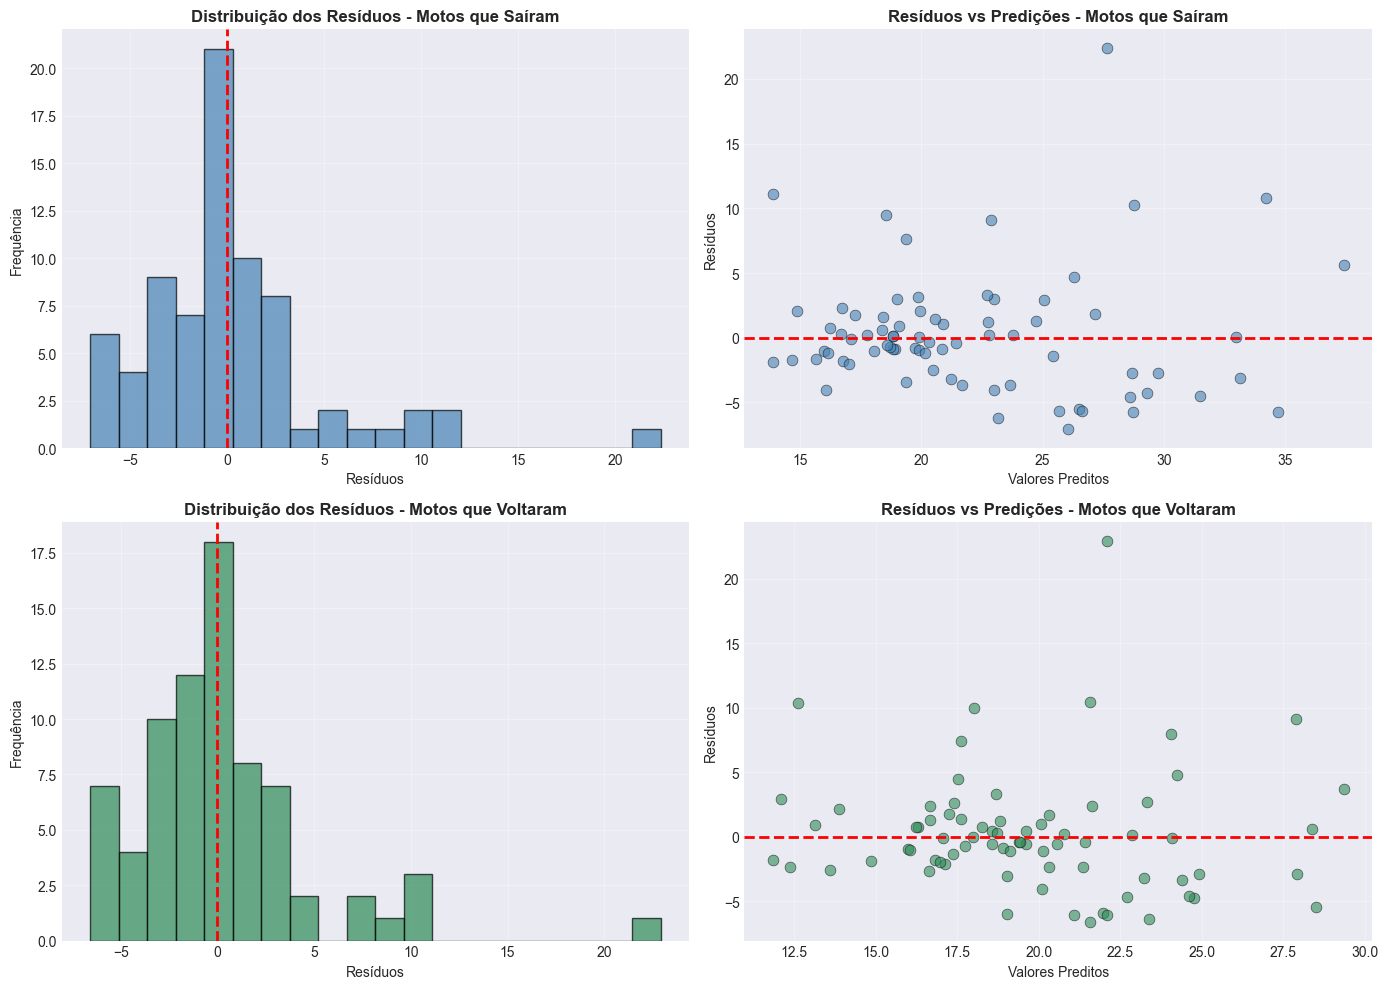

Estatísticas dos Resíduos - Motos que Saíram:
  Média: 0.2292
  DP: 4.7215
  Min: -7.06, Max: 22.35

Estatísticas dos Resíduos - Motos que Voltaram:
  Média: 0.1911
  DP: 4.6638
  Min: -6.58, Max: 22.92


In [18]:
residuos_saida = y_saida_test - y_saida_pred_test
residuos_volta = y_volta_test - y_volta_pred_test

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(residuos_saida, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Resíduos')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição dos Resíduos - Motos que Saíram', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(y_saida_pred_test, residuos_saida, alpha=0.6, c='steelblue', 
                   s=60, edgecolors='black', linewidth=0.5)
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Valores Preditos')
axes[0, 1].set_ylabel('Resíduos')
axes[0, 1].set_title('Resíduos vs Predições - Motos que Saíram', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(residuos_volta, bins=20, color='seagreen', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Resíduos')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Distribuição dos Resíduos - Motos que Voltaram', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(y_volta_pred_test, residuos_volta, alpha=0.6, c='seagreen', 
                   s=60, edgecolors='black', linewidth=0.5)
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Valores Preditos')
axes[1, 1].set_ylabel('Resíduos')
axes[1, 1].set_title('Resíduos vs Predições - Motos que Voltaram', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Estatísticas dos Resíduos - Motos que Saíram:")
print(f"  Média: {residuos_saida.mean():.4f}")
print(f"  DP: {residuos_saida.std():.4f}")
print(f"  Min: {residuos_saida.min():.2f}, Max: {residuos_saida.max():.2f}")

print("\nEstatísticas dos Resíduos - Motos que Voltaram:")
print(f"  Média: {residuos_volta.mean():.4f}")
print(f"  DP: {residuos_volta.std():.4f}")
print(f"  Min: {residuos_volta.min():.2f}, Max: {residuos_volta.max():.2f}")


## 8. Salvamento dos Modelos para Produção


In [19]:
MODELS_DIR = Path('models')
MODELS_DIR.mkdir(exist_ok=True)

joblib.dump(model_saida, MODELS_DIR / 'model_saida.pkl')
joblib.dump(model_volta, MODELS_DIR / 'model_volta.pkl')
joblib.dump(scaler, MODELS_DIR / 'scaler.pkl')
joblib.dump(FEATURES, MODELS_DIR / 'features.pkl')

metricas = {
    'model_saida': {
        'mse': float(mse_test_saida),
        'mae': float(mae_test_saida),
        'rmse': float(rmse_test_saida),
        'r2': float(r2_test_saida)
    },
    'model_volta': {
        'mse': float(mse_test_volta),
        'mae': float(mae_test_volta),
        'rmse': float(rmse_test_volta),
        'r2': float(r2_test_volta)
    }
}
joblib.dump(metricas, MODELS_DIR / 'metricas.pkl')

print("Modelos salvos em 'models/':")
for file in sorted(MODELS_DIR.glob('*.pkl')):
    size_kb = file.stat().st_size / 1024
    print(f"  {file.name} ({size_kb:.2f} KB)")


Modelos salvos em 'models/':
  features.pkl (0.17 KB)
  metricas.pkl (0.15 KB)
  model_saida.pkl (1687.78 KB)
  model_volta.pkl (1650.09 KB)
  scaler.pkl (1.51 KB)


## 9. Validação de Compatibilidade


In [20]:
model_saida_loaded = joblib.load(MODELS_DIR / 'model_saida.pkl')
model_volta_loaded = joblib.load(MODELS_DIR / 'model_volta.pkl')
scaler_loaded = joblib.load(MODELS_DIR / 'scaler.pkl')
features_loaded = joblib.load(MODELS_DIR / 'features.pkl')
metricas_loaded = joblib.load(MODELS_DIR / 'metricas.pkl')

print(f"Features carregadas ({len(features_loaded)}):")
for i, feat in enumerate(features_loaded, 1):
    print(f"  {i:2d}. {feat}")

print(f"\nMétricas:")
print(f"  Modelo Saída - R²: {metricas_loaded['model_saida']['r2']:.4f}, "
      f"MAE: {metricas_loaded['model_saida']['mae']:.2f}")
print(f"  Modelo Volta - R²: {metricas_loaded['model_volta']['r2']:.4f}, "
      f"MAE: {metricas_loaded['model_volta']['mae']:.2f}")


Features carregadas (12):
   1. galpao
   2. dia_semana
   3. motos_em_uso
   4. motos_disponiveis
   5. choveu
   6. total_motos
   7. feriado
   8. tipo_dia
   9. saldo_dia
  10. taxa_ocupacao
  11. choveu_fds
  12. feriado_fds

Métricas:
  Modelo Saída - R²: 0.5561, MAE: 3.14
  Modelo Volta - R²: 0.3779, MAE: 3.09


### Teste de Predição


In [21]:
cenarios_teste = [
    {
        'nome': 'Domingo, fim de semana, feriado, sem chuva',
        'galpao': 0, 'dia_semana': 6, 'motos_em_uso': 18,
        'motos_disponiveis': 82, 'choveu': 0, 'total_motos': 100,
        'feriado': 1, 'tipo_dia': 1, 'saldo_dia': 7
    },
    {
        'nome': 'Quarta-feira, dia útil, sem chuva',
        'galpao': 0, 'dia_semana': 2, 'motos_em_uso': 30,
        'motos_disponiveis': 70, 'choveu': 0, 'total_motos': 100,
        'feriado': 0, 'tipo_dia': 0, 'saldo_dia': 2
    },
    {
        'nome': 'Sexta-feira, dia útil, com chuva',
        'galpao': 0, 'dia_semana': 4, 'motos_em_uso': 25,
        'motos_disponiveis': 75, 'choveu': 1, 'total_motos': 100,
        'feriado': 0, 'tipo_dia': 0, 'saldo_dia': -3
    }
]

resultados_testes = []

for i, cenario in enumerate(cenarios_teste, 1):
    taxa_ocupacao = cenario['motos_em_uso'] / cenario['total_motos']
    choveu_fds = cenario['choveu'] * cenario['tipo_dia']
    feriado_fds = cenario['feriado'] * cenario['tipo_dia']
    
    input_data = pd.DataFrame([[
        cenario['galpao'], cenario['dia_semana'], cenario['motos_em_uso'],
        cenario['motos_disponiveis'], cenario['choveu'], cenario['total_motos'],
        cenario['feriado'], cenario['tipo_dia'], cenario['saldo_dia'],
        taxa_ocupacao, choveu_fds, feriado_fds
    ]], columns=features_loaded)
    
    input_scaled = scaler_loaded.transform(input_data)
    pred_saida = model_saida_loaded.predict(input_scaled)[0]
    pred_volta = model_volta_loaded.predict(input_scaled)[0]
    
    resultados_testes.append({
        'Cenário': cenario['nome'],
        'Saíram': round(pred_saida, 2),
        'Voltaram': round(pred_volta, 2),
        'Saldo': round(pred_saida - pred_volta, 2)
    })
    
    print(f"Cenário {i}: {cenario['nome']}")
    print(f"  Saíram: {pred_saida:.2f}, Voltaram: {pred_volta:.2f}, Saldo: {pred_saida - pred_volta:+.2f}\n")

resultados_df = pd.DataFrame(resultados_testes)
print("Resumo:")
print(resultados_df.to_string(index=False))


Cenário 1: Domingo, fim de semana, feriado, sem chuva
  Saíram: 29.29, Voltaram: 22.72, Saldo: +6.57

Cenário 2: Quarta-feira, dia útil, sem chuva
  Saíram: 19.88, Voltaram: 20.75, Saldo: -0.87

Cenário 3: Sexta-feira, dia útil, com chuva
  Saíram: 14.47, Voltaram: 16.21, Saldo: -1.74

Resumo:
                                   Cenário  Saíram  Voltaram  Saldo
Domingo, fim de semana, feriado, sem chuva   29.29     22.72   6.57
         Quarta-feira, dia útil, sem chuva   19.88     20.75  -0.87
          Sexta-feira, dia útil, com chuva   14.47     16.21  -1.74


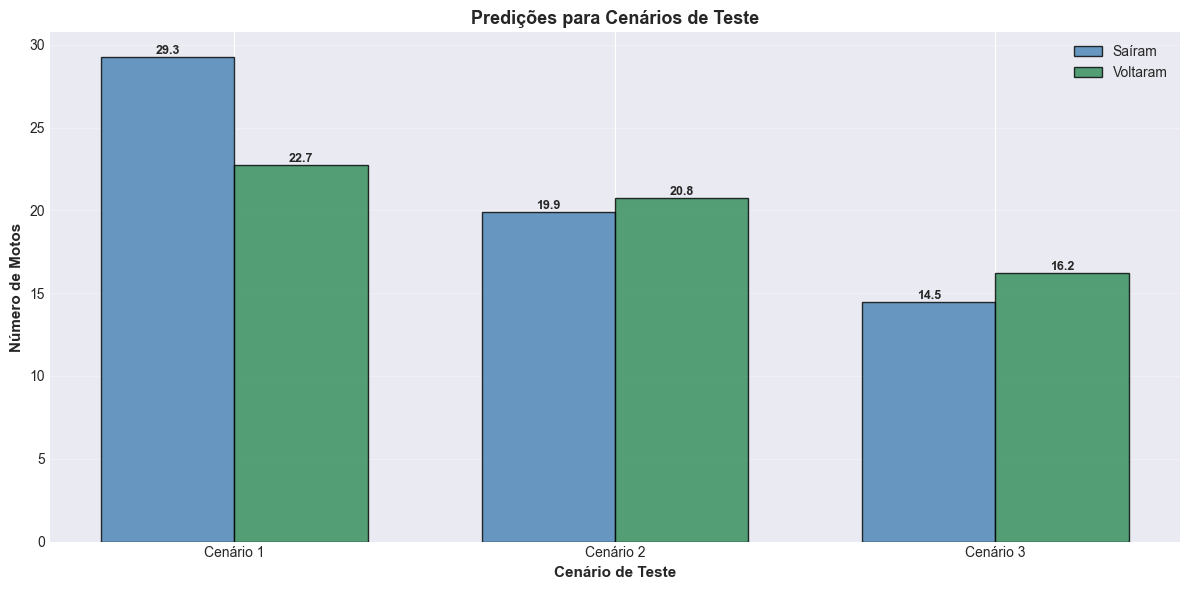

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(resultados_df))
width = 0.35

bars1 = ax.bar(x - width/2, resultados_df['Saíram'], width, 
               label='Saíram', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, resultados_df['Voltaram'], width, 
               label='Voltaram', color='seagreen', alpha=0.8, edgecolor='black')

ax.set_xlabel('Cenário de Teste', fontsize=11, fontweight='bold')
ax.set_ylabel('Número de Motos', fontsize=11, fontweight='bold')
ax.set_title('Predições para Cenários de Teste', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'Cenário {i+1}' for i in range(len(resultados_df))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


In [23]:
print("\nArquivos gerados:")
for file in sorted(MODELS_DIR.glob('*.pkl')):
    print(f"  {file.name}")

print(f"\nMétricas Finais:")
print(f"  Modelo Saída  - R²: {r2_test_saida:.4f} | MAE: {mae_test_saida:.2f} | RMSE: {rmse_test_saida:.2f}")
print(f"  Modelo Volta  - R²: {r2_test_volta:.4f} | MAE: {mae_test_volta:.2f} | RMSE: {rmse_test_volta:.2f}")

print(f"\nFeatures ({len(FEATURES)} total): {', '.join(FEATURES)}")

print("\nPróximos passos:")
print("  1. Modelos disponíveis para uso na API e Dashboard")
print("  2. Execute: uvicorn app:app --reload")
print("  3. Execute: streamlit run dashboard.py")



Arquivos gerados:
  features.pkl
  metricas.pkl
  model_saida.pkl
  model_volta.pkl
  scaler.pkl

Métricas Finais:
  Modelo Saída  - R²: 0.5561 | MAE: 3.14 | RMSE: 4.70
  Modelo Volta  - R²: 0.3779 | MAE: 3.09 | RMSE: 4.64

Features (12 total): galpao, dia_semana, motos_em_uso, motos_disponiveis, choveu, total_motos, feriado, tipo_dia, saldo_dia, taxa_ocupacao, choveu_fds, feriado_fds

Próximos passos:
  1. Modelos disponíveis para uso na API e Dashboard
  2. Execute: uvicorn app:app --reload
  3. Execute: streamlit run dashboard.py
